#### This Notebook will cover one of the most efficient algorithm for spam mails classification i.e using Navie Bayes Classification

#### Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

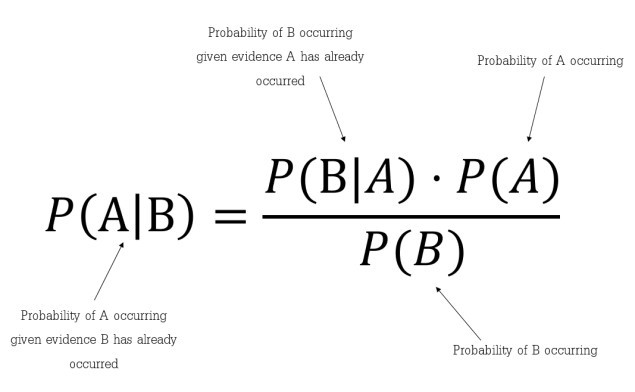

#### The Dataset is downloaded from : 

#### The messages are simple uncleaned strings with combinations of text and HTML tags.

#### Method used : CountVectorizer from sklearn to clean messages
                   1)Tokenizing
                   2)Removing Stop words
                   3)Vectorizing

####                         Algorithm: MultinomialNB

In [ ]:
#### Dataset for raw text mails : https://www.kaggle.com/chandramoulinaidu/spam-classification-for-basic-nlp

In [ ]:
!pip install bs4

In [ ]:
# Importing the packages

import pandas as pd
import numpy as np
import operator

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

from wordcloud import WordCloud
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import recall_score, precision_score, f1_score

In [ ]:
data = pd.read_csv('../input/spam-classification-for-basic-nlp/Spam Email raw text for NLP.csv')

In [ ]:
data.head()

In [ ]:
data.to_csv("Spam Email raw text for NLP.csv",index=False)

In [ ]:
data.shape

In [ ]:
# Lets check % of spam and non spam messages
category_names = ['Spam',"Legit mail"]
size = [data.CATEGORY.value_counts()[1],data.CATEGORY.value_counts()[0]]

# Pie chart 
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

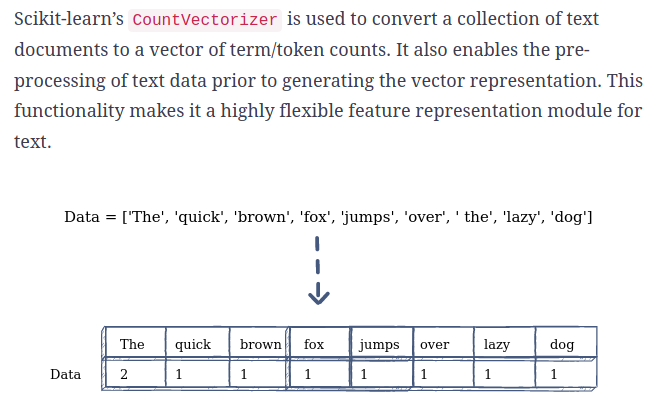

In [ ]:
vectorizer = CountVectorizer(stop_words = 'english')

In [ ]:
# Fitting the text messages to vectorizer give a sparse matrix

all_features = vectorizer.fit_transform(data['MESSAGE'])

In [ ]:
type(all_features)

In [ ]:
all_features.shape

In [ ]:
# Vectorizer has attribute .vocabulary_ which stores the cout of words from the entire message feature of data df
vocab_dict = vectorizer.vocabulary_

In [ ]:
#### For Plotting word cloud we need all words combined from all the messages in the data, using Snowball stemmer,
#### html parser and tokenizing inside below fn to generate require words

In [ ]:
def clean_message(message, stemmer=SnowballStemmer("english"), stop_words=stopwords.words("english")):
    
    #Removing HTML tags:
    soup = BeautifulSoup(message, "html.parser")
    cleaned_text = soup.get_text()
    
    #Coverting to Lower Case and Tokenising
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words =[]
    
    for word in words:
        # Stemming and removing Punctuation 
        if word not in stop_words and word.isalpha():
            stemmed_word = stemmer.stem(word)
            filtered_words.append(stemmed_word)
    
    return filtered_words

In [ ]:
%%time

nested_list = data.MESSAGE.apply(clean_message)
all_words = [item for sublist in nested_list for item in sublist]

In [ ]:
normal_cloud = WordCloud(background_color="white", max_words=500, colormap='winter')
normal_cloud.generate(" ".join(all_words))
plt.figure(figsize=(10,8), dpi=100)
plt.imshow(normal_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#### MultinomialNB model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_features, data.CATEGORY, test_size=0.30, random_state=88)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
classifier = MultinomialNB()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
yhat = classifier.predict(X_test)

In [ ]:
correct_predictions =(yhat == y_test).sum()
incorrect_prediction = X_test.shape[0] - (yhat == y_test).sum()
accuracy = round(correct_predictions/X_test.shape[0],2)

In [ ]:
print("Number of documents predicted correctly",correct_predictions )
print("Number of documents predicted correctly", incorrect_prediction)
print("Accuracy is ", accuracy)

In [ ]:
classifier.score(X_test,y_test)

In [ ]:
#Checking recall, precision and f1 score for the model

recall_score(y_test,yhat),precision_score(y_test,yhat),f1_score(y_test,yhat)